<a href="https://colab.research.google.com/github/alihojatnia/Knowledge-Graph-/blob/main/KG_catalyst_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install networkx

In [ ]:
import pandas as pd

In [ ]:
import networkx as nx

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/catalyst/catalyst.csv')
bulk = df['adsorption_measurement/bulk_surface_property_set/bulk_surface_material/name']
adsorbate_species = df['adsorption_measurement/adsorbate_species/molecular_formula']

cat = []
cat = pd.DataFrame(cat)
cat['bulk'] = bulk
cat['adsorbate'] = adsorbate_species
cat = cat.iloc[:,]
cat

,bulk,adsorbate
0,Cu,O
1,Cu,O2
2,Ag,O
3,Ag,O2
4,Ni,O2
...,...,...
1125,Cu,H
1126,Ag,H
1127,Ag,H
1128,Au,H


In [ ]:
from itertools import combinations
results = []
for i, j in combinations(cat.iterrows(), 2):
    bulk_i = i[1]['bulk']
    bulk_j = j[1]['bulk']
    ad_i = i[1]['adsorbate']
    ad_j = j[1]['adsorbate']
    if bulk_i != bulk_j and ad_i == ad_j:
        # print([bulk_i,ad_i,bulk_j])
        results.append([bulk_i,ad_i,bulk_j])

In [ ]:
results_set = {tuple(result) for result in results}


unique_results = [list(result) for result in results_set]
len(unique_results)

3125

In [ ]:
def add_triplet_to_graph(graph, node1, relationship, node2):
    graph.add_node(node1)
    graph.add_node(node2)
    graph.add_edge(node1, node2, label=relationship)

# Create an empty graph
knowledge_graph = nx.Graph()

for i in unique_results:
  triplet = i
  add_triplet_to_graph(knowledge_graph,*triplet)


In [ ]:
# Get all nodes in the graph
nodes = knowledge_graph.number_of_nodes()
print("Nodes:", nodes)

# Get all edges in the graph
edges = knowledge_graph.number_of_edges()
print("Edges:", edges)


Nodes: 46
Edges: 812


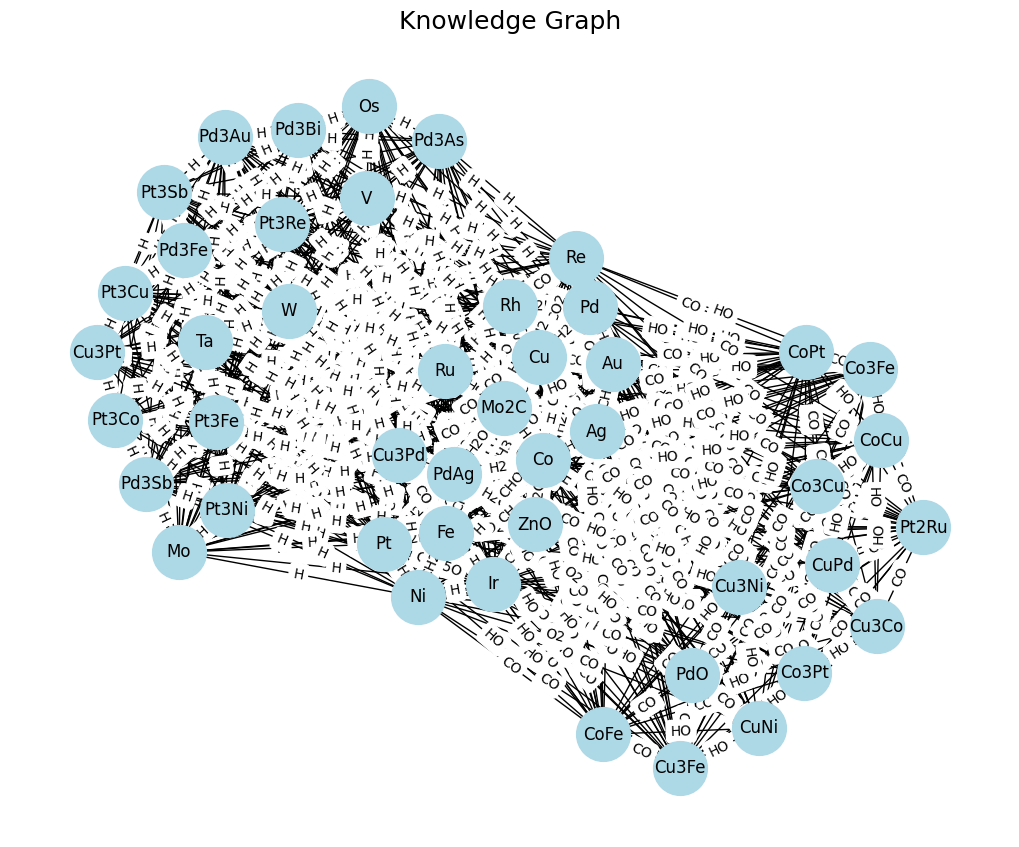

In [ ]:
# Draw the knowledge graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(knowledge_graph, seed=42)
edge_labels = nx.get_edge_attributes(knowledge_graph, 'label')
node_labels = {node: node for node in knowledge_graph.nodes()}

plt.figure(figsize=(10, 8))
nx.draw(knowledge_graph, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=1500, font_size=12)
nx.draw_networkx_edge_labels(knowledge_graph, pos, edge_labels=edge_labels, font_size=10)
plt.title("Knowledge Graph", fontsize=18)
plt.axis('off')
plt.show()

In [ ]:
# Finding neighbors of a node (catalyst) in the knowledge graph
def find_neighbors(knowledge_graph, catalyst_name):
    return list(knowledge_graph.neighbors(catalyst_name))

# Finding all nodes (catalysts) in the knowledge graph
def get_all_catalysts(knowledge_graph):
    return list(knowledge_graph.nodes())

# Finding all edges (adsorbed substances) in the knowledge graph
def get_all_adsorbed_substances(knowledge_graph):
    return list(knowledge_graph.edges())


find_neighbors(knowledge_graph,'Pd3Au')


['Re',
 'W',
 'Pd3Sb',
 'Os',
 'Pt3Sb',
 'Pd',
 'Pd3Bi',
 'Co',
 'Ir',
 'Mo2C',
 'Cu3Pt',
 'Ru',
 'Cu',
 'Pd3Fe',
 'Mo',
 'Pt',
 'Au',
 'Fe',
 'Ta',
 'Pd3As',
 'Pt3Fe',
 'ZnO',
 'Ag',
 'Pt3Cu',
 'Pt3Co',
 'Pt3Re',
 'PdAg',
 'Ni',
 'Rh',
 'V',
 'Cu3Pd',
 'Pt3Ni']

In [ ]:
import networkx as nx

# Computing degree centrality for each node (catalyst)
def degree_centrality_analysis(knowledge_graph):
    return nx.degree_centrality(knowledge_graph)

# Computing betweenness centrality for each node (catalyst)
def betweenness_centrality_analysis(knowledge_graph):
    return nx.betweenness_centrality(knowledge_graph)

# Computing closeness centrality for each node (catalyst)
def closeness_centrality_analysis(knowledge_graph):
    return nx.closeness_centrality(knowledge_graph)



print(degree_centrality_analysis(knowledge_graph))
print(betweenness_centrality_analysis(knowledge_graph))
print(closeness_centrality_analysis(knowledge_graph))


{'Rh': 1.0, 'Ir': 1.0, 'Pt': 1.0, 'Ru': 1.0, 'Cu3Pd': 1.0, 'Pt3Sb': 0.7111111111111111, 'CuPd': 0.6, 'Cu': 1.0, 'Pd': 1.0, 'Fe': 1.0, 'ZnO': 1.0, 'Au': 1.0, 'Re': 1.0, 'Co3Cu': 0.6222222222222222, 'Co3Pt': 0.6222222222222222, 'Cu3Fe': 0.6222222222222222, 'Mo2C': 1.0, 'Co': 1.0, 'Ni': 1.0, 'Ag': 1.0, 'Pd3Bi': 0.7111111111111111, 'V': 0.7111111111111111, 'PdAg': 0.9555555555555556, 'Mo': 0.7111111111111111, 'Pd3Fe': 0.7111111111111111, 'Pt3Re': 0.7111111111111111, 'CoCu': 0.6222222222222222, 'Cu3Co': 0.6222222222222222, 'Pt3Co': 0.7111111111111111, 'CoFe': 0.6222222222222222, 'Cu3Pt': 0.7111111111111111, 'CuNi': 0.6222222222222222, 'CoPt': 0.6222222222222222, 'Co3Fe': 0.6222222222222222, 'Pd3Au': 0.7111111111111111, 'Cu3Ni': 0.6222222222222222, 'W': 0.7111111111111111, 'Ta': 0.7111111111111111, 'Pt3Ni': 0.7111111111111111, 'PdO': 0.6222222222222222, 'Pt2Ru': 0.6, 'Pt3Cu': 0.7111111111111111, 'Pd3Sb': 0.7111111111111111, 'Os': 0.7111111111111111, 'Pd3As': 0.7111111111111111, 'Pt3Fe': 0.71

In [ ]:
# Performing community detection using Louvain method
def community_detection(knowledge_graph):
    communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(knowledge_graph)
    return list(communities)

community_detection(knowledge_graph)

[frozenset({'Ag',
            'Au',
            'Co',
            'Co3Cu',
            'Co3Fe',
            'Co3Pt',
            'CoCu',
            'CoFe',
            'CoPt',
            'Cu',
            'Cu3Co',
            'Cu3Fe',
            'Cu3Ni',
            'Cu3Pd',
            'CuNi',
            'CuPd',
            'Fe',
            'Ir',
            'Mo2C',
            'Ni',
            'Pd',
            'PdO',
            'Pt',
            'Pt2Ru'}),
 frozenset({'Cu3Pt',
            'Mo',
            'Os',
            'Pd3As',
            'Pd3Au',
            'Pd3Bi',
            'Pd3Fe',
            'Pd3Sb',
            'PdAg',
            'Pt3Co',
            'Pt3Cu',
            'Pt3Fe',
            'Pt3Ni',
            'Pt3Re',
            'Pt3Sb',
            'Re',
            'Rh',
            'Ru',
            'Ta',
            'V',
            'W',
            'ZnO'})]

<ipython-input-32-564699b1c2a0>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", num_communities)


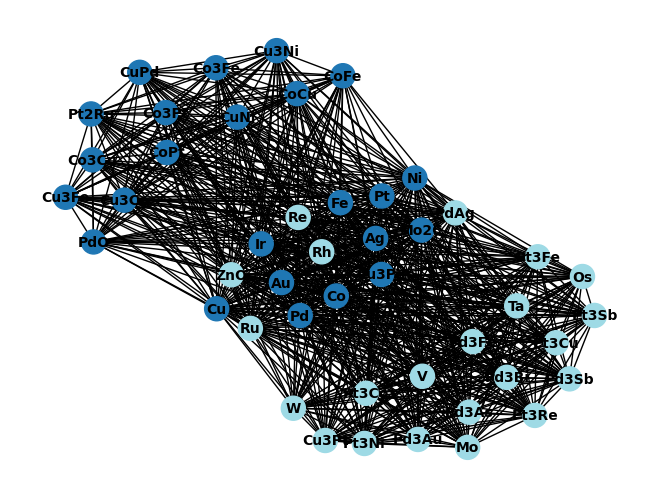

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_communities(knowledge_graph, communities):
    # Create a new graph for visualization
    visualization_graph = nx.Graph()

    # Add nodes from the original knowledge graph
    visualization_graph.add_nodes_from(knowledge_graph.nodes())

    # Add edges from the original knowledge graph
    visualization_graph.add_edges_from(knowledge_graph.edges())

    # Create a dictionary to store the community membership of each node
    community_membership = {}
    for idx, community in enumerate(communities):
        for node in community:
            community_membership[node] = idx

    # Assign a color to each community for visualization
    num_communities = len(communities)
    color_map = plt.cm.get_cmap("tab20", num_communities)

    # Get the color for each node based on its community membership
    node_colors = [color_map(community_membership[node]) for node in visualization_graph.nodes()]

    # Define the layout for visualization (e.g., spring_layout, circular_layout, etc.)
    pos = nx.spring_layout(visualization_graph)

    # Draw the graph with nodes colored by community membership
    nx.draw(visualization_graph, pos, node_color=node_colors, with_labels=True,
            font_size=10, font_weight="bold")

    plt.show()

visualize_communities(knowledge_graph, community_detection(knowledge_graph))
